<a href="https://colab.research.google.com/github/Brynlai/DataScienceHeartDiseaseAssignment/blob/Bryan/NoRemoveOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# @title
!pip install ucimlrepo
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Fetch the Heart Disease dataset from the UCI ML Repository
heart_disease_bunch = fetch_ucirepo(id=45)

# Print the fetched dataset
print(heart_disease_bunch)

{'data': {'ids': None, 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1   

In [84]:
# Load into DataFrame
heart_disease = pd.DataFrame(data=heart_disease_bunch.data.features,
                             columns=heart_disease_bunch.data.feature_names,
                             index=heart_disease_bunch.data.ids)

heart_disease = pd.concat([heart_disease, heart_disease_bunch.data.targets], axis=1)
df = heart_disease
print(df.info())

df = df.rename(columns={'num': 'target'})
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

# Define bins for age
age_bins = [10, 20, 30, 40, 50, 60, np.inf]
age_labels = [1, 2, 3, 4, 5, 6]  # Assign numerical labels
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Define bins for resting blood pressure
trestbps_bins = [0, 100, 120, 140, 160, np.inf]
trestbps_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['trestbps_binned'] = pd.cut(df['trestbps'], bins=trestbps_bins, labels=trestbps_labels, include_lowest=True)

# Define bins for serum cholesterol
chol_bins = [0, 160, 200, 240, 280, np.inf]
chol_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['chol_binned'] = pd.cut(df['chol'], bins=chol_bins, labels=chol_labels, include_lowest=True)

# Define bins for maximum heart rate achieved
thalach_bins = [0, 90, 120, 150, 180, np.inf]
thalach_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['thalach_binned'] = pd.cut(df['thalach'], bins=thalach_bins, labels=thalach_labels, include_lowest=True)

# Define bins for ST depression induced by exercise
oldpeak_bins = [0, 0.5, 1.5, 2.5, 3.5, np.inf]
oldpeak_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=oldpeak_bins, labels=oldpeak_labels, include_lowest=True)

# Drop original numerical columns if desired
df = df.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis=1)

# Print the updated DataFrame
print(df.head())
print(df.shape)
# Iterate over each column in the DataFrame
for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
Column: age
age
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8


<ipython-input-84-c78e47dc46ce>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-84-c78e47dc46ce>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-84-c78e47dc46ce>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-84-c78e47dc46ce>:54: FutureWarning: The def

In [85]:
column_names = {
    "age_binned": "Age",
    "sex": "Gender",
    "cp": "ChestPainType",
    "trestbps_binned": "RestingBP",
    "fbs": "FastBloodSugar",
    "restecg": "RestingECG",
    "exang": "ExerciseAngina",
    "slope": "ExerciseSlope",
    "ca": "MajorVessels",
    "thal": "ThalliumStress",
    "target": "HeartDisease",
    "chol_binned": "SerumCholesterol",
    "thalach_binned": "MaxHeartRate",
    "oldpeak_binned": "OldPeak"
}
df.rename(columns=column_names, inplace=True)
# print("------- Renamed df:", df)

# Export the entire DataFrame to a CSV file (including all rows and columns)
# heart_disease.to_csv('heart_disease_full.csv', index=False)
# Iterate over each column in the DataFrame


In [87]:
# DATA CLEANING : Dealing with duplicate observation
# Check for any duplicate observation
duplicate_rows = df.duplicated()
print("Number of duplicate rows before:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows again
duplicate_rows = df.duplicated()
print("Number of duplicate rows after:", duplicate_rows.sum())


Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [89]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Replace missing values with the median of each column, only if the column is numerical
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numerical
        df[column] = df[column].fillna(df[column].median())

# Check if there are any missing values left
missing_values_after = df.isnull().sum()
print("Missing values after replacing with medians:")
print(missing_values_after)
for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

Missing values in each column:
Gender              0
ChestPainType       0
FastBloodSugar      0
RestingECG          0
ExerciseAngina      0
ExerciseSlope       0
MajorVessels        0
ThalliumStress      0
HeartDisease        0
Age                 0
RestingBP           0
SerumCholesterol    0
MaxHeartRate        0
OldPeak             0
dtype: int64
Missing values after replacing with medians:
Gender              0
ChestPainType       0
FastBloodSugar      0
RestingECG          0
ExerciseAngina      0
ExerciseSlope       0
MajorVessels        0
ThalliumStress      0
HeartDisease        0
Age                 0
RestingBP           0
SerumCholesterol    0
MaxHeartRate        0
OldPeak             0
dtype: int64
Column: Gender
Gender
0     97
1    205
dtype: int64

Column: ChestPainType
ChestPainType
1     23
2     49
3     86
4    144
dtype: int64

Column: FastBloodSugar
FastBloodSugar
0    257
1     45
dtype: int64

Column: RestingECG
RestingECG
0    150
1      4
2    148
dtype: int64

C

<ipython-input-89-782e71f9fd31>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-89-782e71f9fd31>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-89-782e71f9fd31>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-89-782e71f9fd31>:17: FutureWarning: The def

In [80]:


# # Select only numerical columns
# numeric_columns = df.select_dtypes(include=[np.number]).columns

# # Calculate IQR for each numerical column
# Q1 = df[numeric_columns].quantile(0.25)
# Q3 = df[numeric_columns].quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers
# outlier_mask = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# # Sum the number of outliers in each column
# outliers = outlier_mask.sum()

# print("Number of outliers in each column:")
# print(outliers)

# # Visualize outliers with boxplots, but only for numerical columns
# plt.figure(figsize=(10, 5))
# sns.boxplot(data=df[numeric_columns])
# plt.xticks(rotation=45)
# plt.title('Boxplots for detecting outliers in numerical columns')
# plt.show()

# # Handle outliers (e.g., impute with median)
# # Handle outliers (e.g., impute with median)
# for column in numeric_columns:
#     is_outlier = outlier_mask[column]
#     if is_outlier.any():
#         median_value = df[column].median()
#         if median_value != 0:  # Ensure median is not 0
#             df.loc[is_outlier, column] = median_value
#             print(f"Replaced outliers in column '{column}' with median value {median_value}")
#         else:
#             print(f"Warning: Median of column '{column}' is 0. Skipping imputation.")

# # Verify if there are any remaining outliers
# remaining_outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
# print("Remaining outliers in each column after imputation:")
# print(remaining_outliers)

# # Visualize outliers with boxplots after imputation
# plt.figure(figsize=(10, 5))
# sns.boxplot(data=df[numeric_columns])
# plt.xticks(rotation=45)
# plt.title('Boxplots after imputing outliers with median in numerical columns')
# plt.show()
# for column in df.columns:
#     # Group by the column and get the size of each group
#     group_sizes = df.groupby(column).size()
#     print(f"Column: {column}")
#     print(group_sizes)
#     print()  # Empty line for better readability

In [81]:

# # Calculate Q1, Q3, and IQR for numerical columns only
# numerical_columns = df.select_dtypes(include=[np.int64, np.float64]).columns
# Q1 = df[numerical_columns].quantile(0.25)
# Q3 = df[numerical_columns].quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers in numerical columns
# outlier_mask = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# # Debug: Print the first few rows of the outlier mask
# print("Outlier Mask (first few rows):")
# print(outlier_mask.head())

# # Impute outliers with the median of each numerical column
# for column in numerical_columns:
#     is_outlier = outlier_mask[column]
#     if is_outlier.any():
#         median_value = df[column].median()
#         df.loc[is_outlier, column] = median_value
#         print(f"Replaced outliers in column '{column}' with median value {median_value}")

# # Check the DataFrame after imputation
# print("Data after imputing outliers:")
# print(df.head())

# # Verify if there are any remaining outliers in numerical columns
# remaining_outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
# print("Remaining outliers in each numerical column after imputation:")
# print(remaining_outliers)


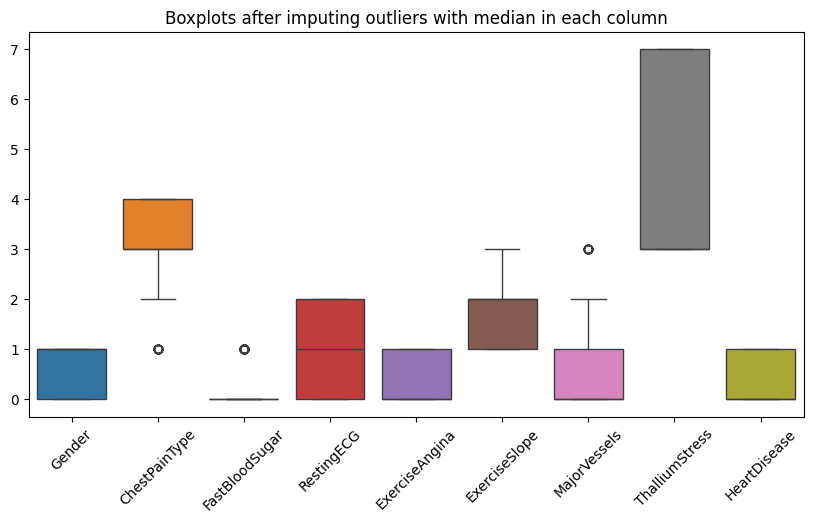

Column: Gender
Gender
0     97
1    205
dtype: int64

Column: ChestPainType
ChestPainType
1     23
2     49
3     86
4    144
dtype: int64

Column: FastBloodSugar
FastBloodSugar
0    257
1     45
dtype: int64

Column: RestingECG
RestingECG
0    150
1      4
2    148
dtype: int64

Column: ExerciseAngina
ExerciseAngina
0    203
1     99
dtype: int64

Column: ExerciseSlope
ExerciseSlope
1    141
2    140
3     21
dtype: int64

Column: MajorVessels
MajorVessels
0.0    179
1.0     65
2.0     38
3.0     20
dtype: int64

Column: ThalliumStress
ThalliumStress
3.0    167
6.0     18
7.0    117
dtype: int64

Column: HeartDisease
HeartDisease
0    163
1    139
dtype: int64

Column: Age
Age
1      0
2      1
3     17
4     75
5    130
6     79
dtype: int64

Column: RestingBP
RestingBP
1      6
2     90
3    140
4     51
5     15
dtype: int64

Column: SerumCholesterol
SerumCholesterol
1      7
2     43
3    100
4     81
5     71
dtype: int64

Column: MaxHeartRate
MaxHeartRate
1      3
2     34
3    

<ipython-input-91-21e9c4fe555a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-91-21e9c4fe555a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-91-21e9c4fe555a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(column).size()
<ipython-input-91-21e9c4fe555a>:10: FutureWarning: The def

In [91]:
# DATA CLEANING : dealing with outliers
# Visualize outliers with boxplots after outliers have been imputed with median values
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots after imputing outliers with median in each column')
plt.show()
for column in df.columns:
    # Group by the column and get the size of each group
    group_sizes = df.groupby(column).size()
    print(f"Column: {column}")
    print(group_sizes)
    print()  # Empty line for better readability

There exists an outlier in MaxHeartRate variable, but it also lies on where the left whisker ends, which is the minimum value. Thus we leave it as is and consider it as not an outlier, since removing it would distort the data.

(14.0, 0.0)

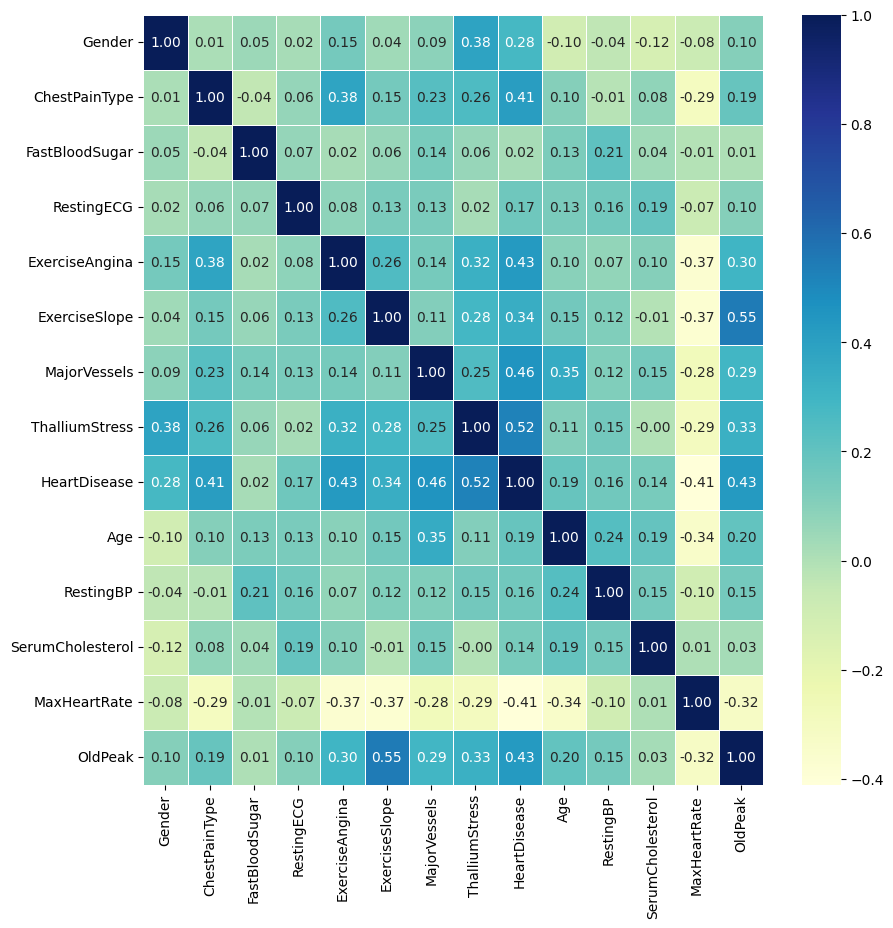

In [92]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()



In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Prepare the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

np.random.seed(564)
test_sizes = {}
for i in range(15, 23):
    test_sizes[f"{i}%"] = i / 100

count = 0
best_models = {}
for sizeOfT, testSize in test_sizes.items():
    print(f"\n---Iteration {count} Test size: {sizeOfT}:")
    count += 1

    # Split the data using the fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=200)

    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, solver='sag'),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "SVM": SVC()
    }

    modelPerformance = {}

    # Perform k-fold cross-validation
    for model_name, model in models.items():
        # Use 5-fold cross-validation as an example
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        avg_cv_score = cv_scores.mean()
        print(f"{model_name} with Cross-Validation Accuracy: {avg_cv_score:.3f}")

        # Train and evaluate the model on the test set
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} with Test Accuracy: {test_accuracy:.3f}")
        modelPerformance[model_name] = (avg_cv_score, test_accuracy)

    # Find and print the best model for this test size based on cross-validation score
    best_model_name = max(modelPerformance, key=lambda x: modelPerformance[x])
    best_model_cv_accuracy, best_model_test_accuracy = modelPerformance[best_model_name]
    print(f"Best Model: {best_model_name} with Cross-Validation Accuracy: {best_model_cv_accuracy:.3f} and Test Accuracy: {best_model_test_accuracy:.3f}")

    # Store the best model for each test size
    best_models[sizeOfT] = (best_model_name, best_model_cv_accuracy, best_model_test_accuracy)

# Print the best models for each test size
print("\nBest Models for Each Test Size:")
for test_size, (best_model, cv_accuracy, test_accuracy) in best_models.items():
    print(f"Test Size: {test_size}, Best Model: {best_model} with Cross-Validation Accuracy: {cv_accuracy:.3f} and Test Accuracy: {test_accuracy:.3f}")


---Iteration 0 Test size: 15%:
Logistic Regression with Cross-Validation Accuracy: 0.828
Logistic Regression with Test Accuracy: 0.826
Decision Tree with Cross-Validation Accuracy: 0.727
Decision Tree with Test Accuracy: 0.826
Random Forest with Cross-Validation Accuracy: 0.813
Random Forest with Test Accuracy: 0.826
Gradient Boosting with Cross-Validation Accuracy: 0.777
Gradient Boosting with Test Accuracy: 0.804
SVM with Cross-Validation Accuracy: 0.824
SVM with Test Accuracy: 0.826
Best Model: Logistic Regression with Cross-Validation Accuracy: 0.828 and Test Accuracy: 0.826

---Iteration 1 Test size: 16%:
Logistic Regression with Cross-Validation Accuracy: 0.822
Logistic Regression with Test Accuracy: 0.837
Decision Tree with Cross-Validation Accuracy: 0.716
Decision Tree with Test Accuracy: 0.816
Random Forest with Cross-Validation Accuracy: 0.822
Random Forest with Test Accuracy: 0.837
Gradient Boosting with Cross-Validation Accuracy: 0.787
Gradient Boosting with Test Accuracy: